In [1]:
import numpy as np
from scipy.stats import norm
import datetime


In [4]:
import numpy as np
from scipy.stats import norm
import datetime

def black_scholes(S, K, T, r, sigma, option='call'):
    """
    S: the current stock price
    K: the strike price of the option
    T: the time to expiration, expressed in years
    r: the risk-free interest rate, expressed as a decimal
    sigma: the volatility of the stock, expressed as a decimal
    option: the type of option, either 'call' or 'put'
    """
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    t = datetime.datetime.now()

    if option == 'call':
        price = norm.cdf(d1)*S-norm.cdf(d2)*K*np.exp(-r*T)
    elif option == 'put':
        # fill in if you want
         price = norm.cdf(-d2)*K*np.exp(-r*T)-norm.cdf(-d1)*S
    else:
        raise ValueError("Option type not recognized. Please enter 'call' or 'put'.")

    return price


In [5]:
# Example usage
S = 100
K = 105
T = 1
r = 0.05
sigma = 0.2
call_price = black_scholes(S, K, T, r, sigma, option='call')
put_price = black_scholes(S, K, T, r, sigma, option='put')
print(f"Call price: {call_price:.2f}")
print(f"Put price: {put_price:.2f}")


Call price: 8.02
Put price: 7.90


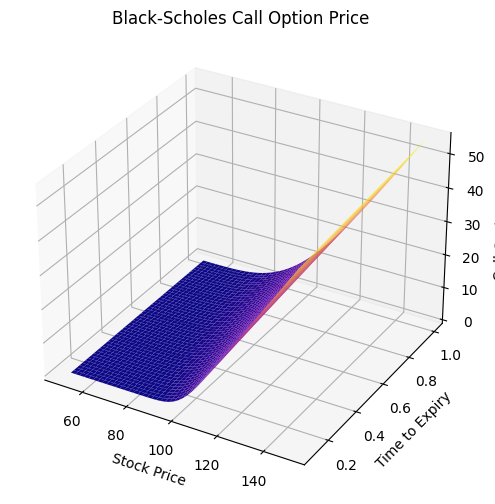

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a meshgrid of stock prices and time to expiry
S_range = np.linspace(50, 150, 50)
T_range = np.linspace(0.1, 1, 50)
S_mesh, T_mesh = np.meshgrid(S_range, T_range)

# Calculate the Black-Scholes call option price for each combination of stock price and time to expiry
r = 0.05
sigma = 0.2
call_price_mesh = np.zeros_like(S_mesh)
for i in range(len(S_range)):
    for j in range(len(T_range)):
        call_price_mesh[j, i] = black_scholes(S_range[i], K=100, T=T_range[j], r=r, sigma=sigma, option='call')

# Create a 3D plot of the Black-Scholes call option price as a function of the stock price and time to expiry
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Call Option Price')
ax.set_title('Black-Scholes Call Option Price')

ax.plot_surface(S_mesh, T_mesh, call_price_mesh, cmap='plasma')
plt.show()